<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 6

By: Brian Du, Kenneth Marenco, Zach Starr

### Problem 0 (3 points)

## A Simple Data Model 

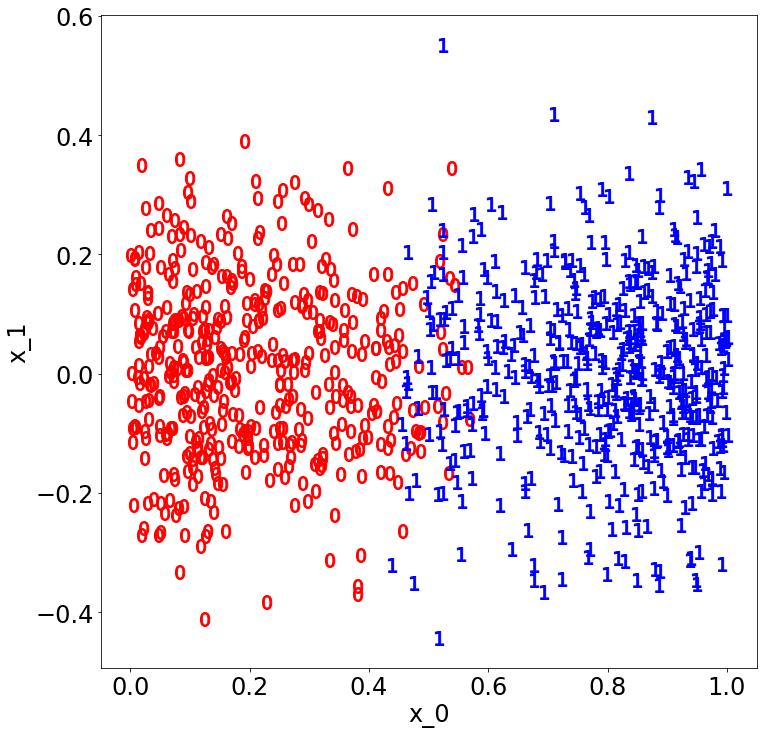

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def ramp_samples(m, d, epsilon):
    rng = np.random.default_rng()
    y = rng.binomial(1, 0.5, m)
    positive = y == 1
    negative = np.logical_not(positive)
    x = rng.normal(scale=0.15, size=(m, d))
    x[negative, 0] = rng.triangular(0., 0., 0.5 + epsilon, sum(negative))
    x[positive, 0] = rng.triangular(0.5 - epsilon, 1., 1., sum(positive))
    return [(x_n, y_n) for x_n, y_n in zip(x, y)]


def plot_samples(samples):
    assert len(samples[0][0]) == 2, 'can only plot 2D samples'
    fs = 24
    for label, color in enumerate(('r', 'b')):
        data = [x for x, y in samples if y == label]
        x = [[d[coord] for d in data] for coord in (0, 1)]
        plt.plot(x[0], x[1], marker='${}$'.format(label), color=color,
                 markersize=14, linewidth=0)
    for ticks in (plt.xticks, plt.yticks):
        ticks(fontsize=fs)
    plt.xlabel('x_0', fontsize=fs)
    plt.ylabel('x_1', fontsize=fs)
    plt.gca().set_aspect(1)


plt.figure(figsize=(12, 12))
plot_samples(ramp_samples(1000, 2, 0.1))
plt.show()


## Part 1: The Bayes Classifier 

### Problem 1.1 (Exam Style)

## Part 2: Test Bias and Variance for Binary Nearest Neighbor Classifiers

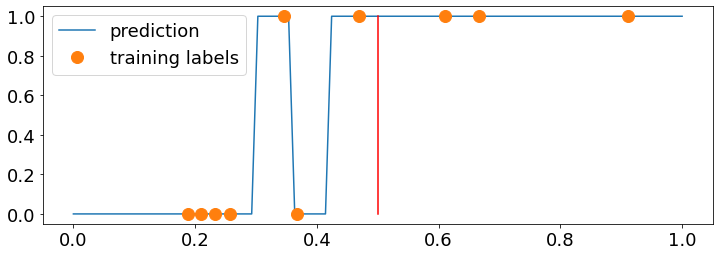

In [3]:
from sklearn import neighbors
import pickle


def train_knn(k, t):
    h = neighbors.KNeighborsClassifier(k)
    x, y = zip(*t)
    h.fit(x, y)
    return h

file_name = 'simple.pkl'
with open(file_name, 'rb') as file:
    train = pickle.load(file)
knn = train_knn(1, train)
x0 = np.linspace(0., 1., 100).reshape(-1, 1)
y_hat = knn.predict(x0)

ms, fs = 12, 18
plt.figure(figsize=(12, 4))
plt.plot(x0, y_hat, label='prediction')
t_x, t_y = zip(*train)
plt.plot(t_x, t_y, marker='o', markersize=ms, linewidth=0, label='training labels')
plt.plot([0.5] * 2, [0, 1], 'r')
for ticks in (plt.xticks, plt.yticks):
    ticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.show()

### Problem 2.1 (Exam Style)

a) Yes
b) Yes
c) Yes

### Problem 2.2

In [6]:
points = 15
parm = [np.round(n).astype(int) for n in np.logspace(1, 3, points)]

def statistics(d=2, e=0.4, m=10, n=10, i=1, j=10):
    #h = neighbors.KNieghborsClassifier(1)
    ret = np.zeros((i,j))
    
    for cur_i in range(i):
        # Generate training set
        train = ramp_samples(m, d, e)
        #train the model
        h = train_knn(1, train)
        
        for cur_j in range(j):
            # Generate samples for set
            test = ramp_samples(n, d, e)
            # Place samples in set to be tested
            x_tlist = []
            y_tlist = []
            for x, y in test:
                x_tlist.append(x)
                y_tlist.append(y)
            x_test = np.array(x_tlist)
            y_test = np.array(y_tlist)

            ret[cur_i][cur_j] = h.score(x_test, y_test)
         
        # Get mean and average for all 100 (j) test sets
    # if list (i=1) return the one mean and sigma
    # return list of 5 (i) means and sigmas    
        
    return ret # return list of 5 (i)
    
print(statistics())
#mean, sigma = np.zeros(points), np.zeros(points)
#for a, n in enumerate(parm):
#    mean[a], sigma[a] = statistics(n=1, i=1, j=100)
    
#print("Mean: ", mean)
#print("Sigma: ", sigma)

[[0.9 0.9 0.9 0.7 0.6 0.9 0.9 0.8 0.8 0.7]]


### Problem 2.3 (Exam Style)

It would make little sense to collect the mean and standard deviation for the training risk because the it is made using 1 nearest neighbors which means that each nearest neighbor is itself leading to a trival no risk situation.

### Problem 2.4 (Partially Exam Style)

### Problem 2.5 (Partially Exam Style)